# MY SPOTIFY SONG REC PROJECT 

In [2]:
!pip install spotipy

In [210]:
!pip install imblearn

     |████████████████████████████████| 199 kB 5.5 MB/s eta 0:00:01     |█████████████▏                  | 81 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 8.5 MB 4.5 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [217]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 2.1 MB/s eta 0:00:01


In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2
import random
from functools import reduce

In [2]:
#entering information from soptify developer app
cid = '0f1c642aefdb4cb28858699ef38ad085'
secret = 'ac283cc370b24d45ad02a95f01dac01c'
redirect_uri='http://localhost:7777/callback'
username = '31qw2kdk57kchr2rpjmesnl3zvvu'

In [3]:
#API Authentication
scope = 'user-top-read playlist-modify-private playlist-modify-public'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [6]:
results = sp.current_user_top_tracks(limit=50, offset=0,time_range='medium_term')
results

{'items': [{'album': {'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/2hlmm7s2ICUX0LVIhVFlZQ'},
      'href': 'https://api.spotify.com/v1/artists/2hlmm7s2ICUX0LVIhVFlZQ',
      'id': '2hlmm7s2ICUX0LVIhVFlZQ',
      'name': 'Gunna',
      'type': 'artist',
      'uri': 'spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     'MC',
     'MT',
     'MX',
     'MY',
     'NI',
     'NL',
     'NO',
     'NZ

In [7]:
# Convert it to Dataframe
track_name = []
track_id = []
artist = []
album = []
duration = []
popularity = []
for i, items in enumerate(results['items']):
        track_name.append(items['name'])
        track_id.append(items['id'])
        artist.append(items["artists"][0]["name"])
        duration.append(items["duration_ms"])
        album.append(items["album"]["name"])
        popularity.append(items["popularity"])

# Create the final df   
df_favourite = pd.DataFrame({ "track_name": track_name, 
                             "album": album, 
                             "track_id": track_id,
                             "artist": artist, 
                             "duration": duration, 
                             "popularity": popularity})

df_favourite

,track_name,album,track_id,artist,duration,popularity
0,DOLLAZ ON MY HEAD (feat. Young Thug),WUNNA,3nS9a01VvXHQriLqJYwRqG,Gunna,197760,74
1,GATTI,JACKBOYS,40mjsnRjCpycdUw3xhS20g,JACKBOYS,181144,76
2,Back In Blood (feat. Lil Durk),Shiesty Season,7FGdjbZ32vMybPuP0IuE7d,Pooh Shiesty,184489,71
3,Held Me Down,Perfect Timing,0jiW3PNiHJxOhWh9oPBJ7m,NAV,228106,61
4,"III. Telegraph Ave. (""Oakland"" by Lloyd)",Because the Internet,0VXfZi7XhfJnuBvF6XiypU,Childish Gambino,210673,65
5,ABOUT YOU (with NAV),We Love You Tecca 2,098a0ODkRj8IUbEGVZMsyN,Lil Tecca,204137,57
6,Myself,NAV,05nbZ1xxVNwUTcGwLbp7CN,NAV,226040,71
7,Arya (feat. A$AP Rocky),Arya,0Rq6JJwpZ9f1SU6Cfhgjv7,A$AP Rocky,162253,65
8,Power Trip (feat. Miguel),Born Sinner (Deluxe Version),2uwnP6tZVVmTovzX5ELooy,J. Cole,241160,77
9,L$D,AT.LONG.LAST.A$AP,4S7YHmlWwfwArgd8LfSPud,A$AP Rocky,238306,74


In [180]:
def fetch_audio_features(sp, df):
    playlist = df[['track_id','track_name']] 
    index = 0
    audio_features = []
    
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Create an empty list to feed in different charactieritcs of the tracks
    features_list = []
    #Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness'],
                              features['mode']
                             ])
    
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness','duration_ms', 'key',
                                                             'valence', 'speechiness', 'mode'])
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    #df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features

In [181]:
df_fav = fetch_audio_features (sp, df_favourite)
df_fav

,track_id,track_name,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,mode
0,3nS9a01VvXHQriLqJYwRqG,DOLLAZ ON MY HEAD (feat. Young Thug),0.825,0.11400,0.458,145.115,0.000000,-7.470,0.1020,197760,0,0.1610,0.0577,1
1,40mjsnRjCpycdUw3xhS20g,GATTI,0.594,0.13500,0.676,143.477,0.000000,-5.808,0.1630,181145,2,0.4720,0.3440,1
2,7FGdjbZ32vMybPuP0IuE7d,Back In Blood (feat. Lil Durk),0.759,0.15100,0.538,146.933,0.000000,-8.256,0.1260,184490,8,0.8310,0.3840,0
3,0jiW3PNiHJxOhWh9oPBJ7m,Held Me Down,0.826,0.48300,0.422,119.997,0.000000,-8.217,0.1080,228107,3,0.2230,0.1100,0
4,0VXfZi7XhfJnuBvF6XiypU,"III. Telegraph Ave. (""Oakland"" by Lloyd)",0.496,0.15900,0.693,129.929,0.026100,-9.576,0.1420,210673,5,0.5970,0.2470,0
5,098a0ODkRj8IUbEGVZMsyN,ABOUT YOU (with NAV),0.743,0.15400,0.617,86.965,0.000000,-7.008,0.0692,204138,0,0.4530,0.0656,1
6,05nbZ1xxVNwUTcGwLbp7CN,Myself,0.749,0.64800,0.398,80.032,0.000001,-7.440,0.1150,226040,5,0.0859,0.1710,0
7,0Rq6JJwpZ9f1SU6Cfhgjv7,Arya (feat. A$AP Rocky),0.958,0.08230,0.478,120.042,0.000000,-7.669,0.1260,162254,7,0.3790,0.1920,1
8,2uwnP6tZVVmTovzX5ELooy,Power Trip (feat. Miguel),0.667,0.32400,0.608,99.992,0.000198,-7.054,0.4260,241160,1,0.4750,0.2160,1
9,4S7YHmlWwfwArgd8LfSPud,L$D,0.598,0.19400,0.252,120.064,0.133000,-15.086,0.0992,238307,2,0.0352,0.0644,1


In [192]:
df_fav.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          50 non-null     object 
 1   danceability      50 non-null     float64
 2   acousticness      50 non-null     float64
 3   energy            50 non-null     float64
 4   tempo             50 non-null     float64
 5   instrumentalness  50 non-null     float64
 6   loudness          50 non-null     float64
 7   liveness          50 non-null     float64
 8   duration_ms       50 non-null     int64  
 9   key               50 non-null     int64  
 10  valence           50 non-null     float64
 11  speechiness       50 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.8+ KB


In [13]:
df_fav.describe()

,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,duration
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.73782,0.206997,0.566980,127.528840,0.005848,-7.316300,0.175412,4.860000,0.421440,0.215386,3.660000
std,0.11664,0.196587,0.138693,29.395617,0.024045,2.011987,0.137434,3.585743,0.252522,0.141442,1.533437
min,0.45800,0.005740,0.252000,76.469000,0.000000,-15.086000,0.042900,0.000000,0.035200,0.028800,2.000000
25%,0.67925,0.062550,0.451250,110.757000,0.000000,-8.246250,0.103500,1.250000,0.203250,0.081725,3.000000
50%,0.74300,0.148500,0.553500,126.005000,0.000000,-7.352500,0.125500,5.000000,0.419500,0.171000,3.000000
75%,0.81750,0.271500,0.664000,145.073500,0.000009,-6.319750,0.205750,8.000000,0.627750,0.353750,4.000000
max,0.96900,0.867000,0.949000,194.276000,0.133000,-3.130000,0.784000,11.000000,0.899000,0.501000,13.000000


In [14]:
#drop name, artists, avoid data leakage

# PULLING MORE SONGS FROM SPOTIFY

In [15]:
 # Getting playlist IDs from each of Spotify's playlists
playlists1 = sp.user_playlists('spotify')
spotify_playlist_ids = []
while playlists1:
    for i, playlist1 in enumerate(playlists1['items']):
         spotify_playlist_ids.append(playlist1['uri'][-22:])
    if playlists1['next']:
         playlists1 = sp.next(playlists1)
    else:
         playlists1 = None
spotify_playlist_ids[:100]

['37i9dQZF1DXcBWIGoYBM5M',
 '37i9dQZF1DX0XUsuxWHRQd',
 '37i9dQZF1DX1lVhptIYRda',
 '37i9dQZF1DX10zKzsJ2jva',
 '37i9dQZF1DX4JAvHpjipBk',
 '37i9dQZF1DX4sWSpwq3LiO',
 '37i9dQZF1DX4SBhb3fqCJd',
 '37i9dQZF1DWXRqgorJj26U',
 '37i9dQZF1DX4dyzvuaRJ0n',
 '37i9dQZF1DXcF6B6QPhFDv',
 '37i9dQZF1DWXJfnUiYjUKT',
 '37i9dQZF1DXcRXFNfZr7Tp',
 '37i9dQZF1DX4o1oenSJRJd',
 '37i9dQZF1DXbTxeAdrVG2l',
 '37i9dQZF1DX4UtSsGT1Sbe',
 '37i9dQZF1DWTJ7xPn4vNaz',
 '37i9dQZF1DXaKIA8E7WcJj',
 '37i9dQZF1DWSV3Tk4GO2fq',
 '37i9dQZF1DWTwnEm1IYyoj',
 '37i9dQZF1DX2A29LI7xHn1',
 '37i9dQZF1DX2RxBh64BHjQ',
 '37i9dQZF1DWVA1Gq4XHa6U',
 '37i9dQZF1DWY4xHQp97fN6',
 '37i9dQZF1DWX3387IZmjNa',
 '37i9dQZF1DWYkaDif7Ztbp',
 '37i9dQZF1DX5hR0J49CmXC',
 '37i9dQZF1DXan38dNVDdl4',
 '37i9dQZF1DWSvKsRPPnv5o',
 '37i9dQZF1DWUVpAXiEPK8P',
 '37i9dQZF1DX0Tkc6ltcBfU',
 '37i9dQZF1DX1YPTAhwehsC',
 '37i9dQZF1DWTggY0yqBxES',
 '37i9dQZF1DX0HRj9P7NxeE',
 '37i9dQZF1DWT6SJaitNDax',
 '37i9dQZF1DX2r0FByV5U4C',
 '37i9dQZF1DWT2jS7NwYPVI',
 '37i9dQZF1DX82GYcclJ3Ug',
 

In [16]:
playlists1 = sp.user_playlists('spotify')
playlists1['items']

[{'collaborative': False,
  'description': 'Drake is on top of the Hottest 50!',
  'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZF1DXcBWIGoYBM5M'},
  'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M',
  'id': '37i9dQZF1DXcBWIGoYBM5M',
  'images': [{'height': None,
    'url': 'https://i.scdn.co/image/ab67706f00000003bdb19a8abe069e6345fcdf0d',
    'width': None}],
  'name': "Today's Top Hits",
  'owner': {'display_name': 'Spotify',
   'external_urls': {'spotify': 'https://open.spotify.com/user/spotify'},
   'href': 'https://api.spotify.com/v1/users/spotify',
   'id': 'spotify',
   'type': 'user',
   'uri': 'spotify:user:spotify'},
  'primary_color': None,
  'public': True,
  'snapshot_id': 'MTY1NjE4Njk5OCwwMDAwMDU0ZTAwMDAwMTgxOWM3MDBkMjQwMDAwMDE4MTkyN2IyNTlh',
  'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DXcBWIGoYBM5M/tracks',
   'total': 50},
  'type': 'playlist',
  'uri': 'spotify:playlist:37i9dQZF1DXcBWIGoYBM5M'},
 {'

In [17]:
len(spotify_playlist_ids)

1193

In [95]:
# Let's untangle the data
# For looping through the API request
for i, item in enumerate(playlists1['items']):
    print('no: {},Name: {},id: {}, description: {}, total tracks: {}'.
          format(playlists1['offset'] + i, item['name'], item['id'],item['description'], item['tracks']['total']))
if playlists1['next']:
    response = sp.next(playlists1)
else:
    response = None

no: 0,Name: Today's Top Hits,id: 37i9dQZF1DXcBWIGoYBM5M, description: Drake is on top of the Hottest 50!, total tracks: 50
no: 1,Name: RapCaviar,id: 37i9dQZF1DX0XUsuxWHRQd, description: New music from Roddy Ricch,  YG and All-RapCaviar's first team member, Lil Durk., total tracks: 50
no: 2,Name: Hot Country,id: 37i9dQZF1DX1lVhptIYRda, description: Today's top country hits of the week, worldwide! Cover: Luke Combs, total tracks: 50
no: 3,Name: Viva Latino,id: 37i9dQZF1DX10zKzsJ2jva, description: Today's top Latin hits, elevando nuestra música. Cover: Duki, total tracks: 50
no: 4,Name: New Music Friday,id: 37i9dQZF1DX4JAvHpjipBk, description: New music from Lil Nas X, Beyoncé, Taylor Swift, Eminem, Gorillaz, and more!, total tracks: 100
no: 5,Name: Peaceful Piano,id: 37i9dQZF1DX4sWSpwq3LiO, description: Relax and indulge with beautiful piano pieces, total tracks: 385
no: 6,Name: Are & Be,id: 37i9dQZF1DX4SBhb3fqCJd, description: The pulse of R&B music today.  Cover: Giveon, total tracks: 

In [96]:
def featured_playlists(sp):
    id = []
    name = []
    num_tracks = []
 # For looping through the API request  
    for i, items in enumerate(playlists1['items']):
        id.append(items['id'])
        name.append(items['name'])
        num_tracks.append(items['tracks']['total'])

# Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [97]:
df_playlists = featured_playlists(sp)
df_playlists

,id,name,#tracks
0,37i9dQZF1DXcBWIGoYBM5M,Today's Top Hits,50
1,37i9dQZF1DX0XUsuxWHRQd,RapCaviar,50
2,37i9dQZF1DX1lVhptIYRda,Hot Country,50
3,37i9dQZF1DX10zKzsJ2jva,Viva Latino,50
4,37i9dQZF1DX4JAvHpjipBk,New Music Friday,100
5,37i9dQZF1DX4sWSpwq3LiO,Peaceful Piano,385
6,37i9dQZF1DX4SBhb3fqCJd,Are & Be,50
7,37i9dQZF1DWXRqgorJj26U,Rock Classics,200
8,37i9dQZF1DX4dyzvuaRJ0n,mint,100
9,37i9dQZF1DXcF6B6QPhFDv,Rock This,50


In [101]:
def fetch_playlist_tracks(sp, playlistsid): 
    offset = 0
    tracks = []
    # Make the API request
    while True:
            content = sp.playlist_tracks( playlistsid, fields=None,limit = 100, offset=offset, market=None)
            tracks += content['items']
        
            if content['next'] is not None:
                offset += 100
            else:
                break
    
    track_id = []
    track_name = []
    
    for track in tracks:
        track_id.append(track['track']['id'])
        track_name.append(track['track']['name']) 
# Create the final df
    df_playlists_tracks = pd.DataFrame({"track_id":track_id, "track_name": track_name})
    return df_playlists_tracks

In [112]:
fetch_playlist_tracks(sp,'37i9dQZF1DX4JAvHpjipBk')

,track_id,track_name
0,2KukL7UlQ8TdvpaA7bY3ZJ,BREAK MY SOUL
1,3GbQcjKWT7eVpUfzqwUjxv,Late To Da Party (feat. Youngboy Never Broke A...
2,79gv58G6usuURwl6TlmBTu,Outrunnin' Your Memory
3,4axSuOg3BqsowKjRpj59RU,Carolina - From The Motion Picture “Where The ...
4,32ny2YtiR7zKi7PBjiQ5Iy,Real Talk
...,...,...
95,4Q67qRlkLStbxuuHsCGCDe,Decisions
96,3OGH7oTsxIrpBfmmh0PV8q,Blur
97,6p2RUPU8EUHfdNq4hnGX0B,PILOT
98,68UkVdPxJFZDz5Dtz2nGsb,Sad Love


In [174]:
def fetch_audio_features(sp, playlist_id):
    playlist = fetch_playlist_tracks(sp, playlist_id)
    index = 0
    audio_features = []
    # Make the API request
    while index < playlist.shape[0]:
        audio_features += sp.audio_features(playlist.iloc[index:index + 50, 0])
        index += 50
    
    # Create an empty list to feed in different charactieritcs of the tracks
    features_list = []
    #Create keys-values of empty lists inside nested dictionary for album
    for features in audio_features:
        features_list.append([features['danceability'],
                              features['acousticness'],
                              features['energy'], 
                              features['tempo'],
                              features['instrumentalness'], 
                              features['loudness'],
                              features['liveness'],
                              features['duration_ms'],
                              features['key'],
                              features['valence'],
                              features['speechiness']
                             ])                        
    df_audio_features = pd.DataFrame(features_list, columns=['danceability', 'acousticness', 'energy','tempo', 
                                                             'instrumentalness', 'loudness', 'liveness', 'duration_ms', 'key',
                                                             'valence', 'speechiness'])
    
    # Create the final df, using the 'track_id' as index for future reference
    df_playlist_audio_features = pd.concat([playlist, df_audio_features], axis=1)
    #df_playlist_audio_features.set_index('track_name', inplace=True, drop=True)
    return df_playlist_audio_features

In [175]:
# Build the dataframe from the playlists
for i, playlist in enumerate(df_playlists['id']):
    try:
        string_command = "df_{} = fetch_audio_features(sp, playlist)".format(playlist)
        print("Create {}".format(string_command))
        exec(string_command)
    except:
        print("playlist with id {} is not valid, skiping ".format(playlist))
        pass

Create df_37i9dQZF1DXcBWIGoYBM5M = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX0XUsuxWHRQd = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX1lVhptIYRda = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX10zKzsJ2jva = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX4JAvHpjipBk = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX4sWSpwq3LiO = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX4SBhb3fqCJd = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DWXRqgorJj26U = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX4dyzvuaRJ0n = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DXcF6B6QPhFDv = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DWXJfnUiYjUKT = fetch_audio_features(sp, playlist)
playlist with id 37i9dQZF1DWXJfnUiYjUKT is not valid, skiping 
Create df_37i9dQZF1DXcRXFNfZr7Tp = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DX4o1oenSJRJd = fetch_audio_features(sp, playlist)
Create df_37i9dQZF1DXbTxeAd

In [176]:
frames = [df_37i9dQZF1DXcBWIGoYBM5M,df_37i9dQZF1DX0XUsuxWHRQd,df_37i9dQZF1DX1lVhptIYRda
,df_37i9dQZF1DX10zKzsJ2jva 
 ,df_37i9dQZF1DX4JAvHpjipBk 
,df_37i9dQZF1DX4sWSpwq3LiO 
 ,df_37i9dQZF1DX4SBhb3fqCJd 
,df_37i9dQZF1DWXRqgorJj26U 
 ,df_37i9dQZF1DX4dyzvuaRJ0n 
,df_37i9dQZF1DXcF6B6QPhFDv 
,df_37i9dQZF1DXcRXFNfZr7Tp 
 ,df_37i9dQZF1DX4o1oenSJRJd 
,df_37i9dQZF1DXbTxeAdrVG2l 
 ,df_37i9dQZF1DX4UtSsGT1Sbe 
,df_37i9dQZF1DWTJ7xPn4vNaz 
 ,df_37i9dQZF1DXaKIA8E7WcJj 
,df_37i9dQZF1DWSV3Tk4GO2fq 
 ,df_37i9dQZF1DWTwnEm1IYyoj 
,df_37i9dQZF1DX2A29LI7xHn1 
 ,df_37i9dQZF1DX2RxBh64BHjQ 
,df_37i9dQZF1DWVA1Gq4XHa6U 
 ,df_37i9dQZF1DWY4xHQp97fN6 
,df_37i9dQZF1DWX3387IZmjNa 
 ,df_37i9dQZF1DWYkaDif7Ztbp 
,df_37i9dQZF1DX5hR0J49CmXC 
 ,df_37i9dQZF1DXan38dNVDdl4 
,df_37i9dQZF1DWSvKsRPPnv5o 
 ,df_37i9dQZF1DWUVpAXiEPK8P 
,df_37i9dQZF1DX0Tkc6ltcBfU 
,df_37i9dQZF1DWTggY0yqBxES 
 ,df_37i9dQZF1DX0HRj9P7NxeE 
,df_37i9dQZF1DWT6SJaitNDax 
 ,df_37i9dQZF1DX2r0FByV5U4C 
 ,df_37i9dQZF1DX82GYcclJ3Ug 
,df_37i9dQZF1DX49jUV2NfGku 
 ,df_37i9dQZF1DX1Jg9KZ76Rr9 
,df_37i9dQZF1DX8FwnYE6PRvL 
 ,df_37i9dQZF1DX6mvEU1S6INL
,df_37i9dQZF1DX2SK4ytI2KAZ 
 ,df_37i9dQZF1DWZkHEX2YHpDV 
,df_37i9dQZF1DWWJOmJ7nRx0C 
 ,df_37i9dQZF1DZ06evO1nTCV2 
,df_37i9dQZF1DZ06evO4m87u0 
 ,df_37i9dQZF1DZ06evO2CLCA8 
,df_37i9dQZF1DZ06evO3M0Fbi 
 ,df_37i9dQZF1DZ06evO0EhHXi,df_37i9dQZF1DZ06evO4nBpII 
]
df =pd.concat(frames)
df

,track_id,track_name,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness
0,0O6u0VJ46W86TxN9wgyqDj,I Like You (A Happier Song) (with Doja Cat),0.733,0.121000,0.670,100.964,0.000000,-6.009,0.1210,192841,5,0.472,0.0751
1,6xGruZOHLs39ZbVccQTuPZ,Glimpse of Us,0.440,0.891000,0.317,169.914,0.000005,-9.258,0.1410,233456,8,0.268,0.0531
2,29d0nY7TzCoi22XBqDQkiP,Running Up That Hill (A Deal With God) - 2018 ...,0.625,0.659000,0.533,108.296,0.002660,-11.903,0.0546,300840,10,0.139,0.0596
3,0mBP9X2gPCuapvpZ7TGDk3,Left and Right (Feat. Jung Kook of BTS),0.881,0.619000,0.592,101.058,0.000013,-4.898,0.0901,154487,2,0.719,0.0324
4,2KukL7UlQ8TdvpaA7bY3ZJ,BREAK MY SOUL,0.687,0.057500,0.887,114.941,0.000002,-5.040,0.2700,278282,1,0.853,0.0826
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0GYTAipuswOBWFtk06kFCL,Redundant,0.482,0.000009,0.946,115.883,0.001720,-3.416,0.0891,198093,9,0.867,0.0353
46,5nGCVIpxp0u4AYpVpK0pv4,When It's Time,0.399,0.005920,0.605,149.465,0.000075,-5.882,0.0927,203640,7,0.344,0.0253
47,3CgT96psOXwPssPNvYPclP,99 Revolutions,0.475,0.000410,0.949,172.035,0.000000,-3.431,0.0646,229893,0,0.669,0.0859
48,5JwuHzmJCmHuHGjP9W6KtK,Youngblood,0.522,0.001040,0.963,136.515,0.000000,-3.310,0.1490,152760,1,0.782,0.0528


In [177]:
# Dropping the track name which could lead to data leakage
df = df.drop(columns=['track_name'])
df.head()

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness
0,0O6u0VJ46W86TxN9wgyqDj,0.733,0.1210,0.670,100.964,0.000000,-6.009,0.1210,192841,5,0.472,0.0751
1,6xGruZOHLs39ZbVccQTuPZ,0.440,0.8910,0.317,169.914,0.000005,-9.258,0.1410,233456,8,0.268,0.0531
2,29d0nY7TzCoi22XBqDQkiP,0.625,0.6590,0.533,108.296,0.002660,-11.903,0.0546,300840,10,0.139,0.0596
3,0mBP9X2gPCuapvpZ7TGDk3,0.881,0.6190,0.592,101.058,0.000013,-4.898,0.0901,154487,2,0.719,0.0324
4,2KukL7UlQ8TdvpaA7bY3ZJ,0.687,0.0575,0.887,114.941,0.000002,-5.040,0.2700,278282,1,0.853,0.0826


In [191]:
df_fav = df_fav.drop(columns=['track_name'])
df_fav

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness
0,3nS9a01VvXHQriLqJYwRqG,0.825,0.11400,0.458,145.115,0.000000,-7.470,0.1020,197760,0,0.1610,0.0577
1,40mjsnRjCpycdUw3xhS20g,0.594,0.13500,0.676,143.477,0.000000,-5.808,0.1630,181145,2,0.4720,0.3440
2,7FGdjbZ32vMybPuP0IuE7d,0.759,0.15100,0.538,146.933,0.000000,-8.256,0.1260,184490,8,0.8310,0.3840
3,0jiW3PNiHJxOhWh9oPBJ7m,0.826,0.48300,0.422,119.997,0.000000,-8.217,0.1080,228107,3,0.2230,0.1100
4,0VXfZi7XhfJnuBvF6XiypU,0.496,0.15900,0.693,129.929,0.026100,-9.576,0.1420,210673,5,0.5970,0.2470
5,098a0ODkRj8IUbEGVZMsyN,0.743,0.15400,0.617,86.965,0.000000,-7.008,0.0692,204138,0,0.4530,0.0656
6,05nbZ1xxVNwUTcGwLbp7CN,0.749,0.64800,0.398,80.032,0.000001,-7.440,0.1150,226040,5,0.0859,0.1710
7,0Rq6JJwpZ9f1SU6Cfhgjv7,0.958,0.08230,0.478,120.042,0.000000,-7.669,0.1260,162254,7,0.3790,0.1920
8,2uwnP6tZVVmTovzX5ELooy,0.667,0.32400,0.608,99.992,0.000198,-7.054,0.4260,241160,1,0.4750,0.2160
9,4S7YHmlWwfwArgd8LfSPud,0.598,0.19400,0.252,120.064,0.133000,-15.086,0.0992,238307,2,0.0352,0.0644


In [178]:
# Dropping duplicated songs
df = df.drop_duplicates(subset=['track_id'])
df['track_id'].value_counts()

2BBaNuc6B84qcMe0Mg9teB    1
671qYsHx1DL1pNn3qxYg60    1
38XLUjlR84JEwK0SOvX77a    1
5vfjUAhefN7IjHbTvVCT4Z    1
3SlKme42qm1vWrkl3BrZmm    1
                         ..
6hTcuIQa0sxrrByu9wTD7s    1
3aouFaljxig7RLEmPLFtnj    1
6FRwDxXsvSasw0y2eDArsz    1
3cNjgVBKTJ1SvKhunrCdVy    1
1DXbUPygEVCQXOOOO9bIhO    1
Name: track_id, Length: 3849, dtype: int64

In [193]:
# Checking for duplicates in df_fav
df_fav['track_id'].value_counts()

3Ygy1L8ABabUA7MwoOLiPM    1
2hwOoMtWPtTSSn6WHV7Vp5    1
1xpXnpIpuvzpx9jz15baJF    1
0ESJlaM8CE1jRWaNtwSNj8    1
3biGYpmoJRNJu238OYjBVN    1
4S7YHmlWwfwArgd8LfSPud    1
7y911sqgHGHcyU4ivapjwi    1
05nbZ1xxVNwUTcGwLbp7CN    1
6pcywuOeGGWeOQzdUyti6k    1
7FGdjbZ32vMybPuP0IuE7d    1
1qCZ4UBt4LzfW1I5jvu7vx    1
2cYqizR4lgvp4Qu6IQ3qGN    1
0VXfZi7XhfJnuBvF6XiypU    1
1qsHYUd2c1wFGcn7e63QmG    1
0Rq6JJwpZ9f1SU6Cfhgjv7    1
7lAK3oHbfEnvUQWosrMMpR    1
40mjsnRjCpycdUw3xhS20g    1
3eekarcy7kvN4yt5ZFzltW    1
7vTspUAmMKFkUpKL9HLZNL    1
3sTN90bIP2cJ1783ctHykO    1
3nS9a01VvXHQriLqJYwRqG    1
60Mq4EumvcSXznNugo9Op3    1
3zpGLSQ8QbbUnNjweWPLMD    1
4pCEIQ6wBVuaJdER5bALtO    1
1fewSx2d5KIZ04wsooEBOz    1
1x6Zk7hoTIlSOFNZnyxjZD    1
7vgTNTaEz3CsBZ1N4YQalM    1
2aPTvyE09vUCRwVvj0I8WK    1
1ID1QFSNNxi0hiZCNcwjUC    1
6NzuJWrNriXAbSmscAuSIq    1
0jiW3PNiHJxOhWh9oPBJ7m    1
3bhyo2ED5Yd4RLydQBDtD6    1
5ihDGnhQgMA0F0tk9fNLlA    1
6tTy7jzu0pDDn6bE5NaaEJ    1
2Y40huo5ewaKYxsFintYtF    1
0yhxBvedRdGxsPZHJNI4

In [194]:
# Creating favorite column to use in classification
df_fav['favorite'] = 1
df['favorite'] = 0 

In [196]:
# Checking to see if we have the same features in each dataframe
df.columns == df_fav.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# merge the two dataframes together and get ready for machine learning!

In [220]:
print(df.shape)
print(df_fav.shape)

(3899, 13)
(50, 13)


In [198]:
# Combining the favorite dataframe with the dataframe of Spotify's songs
combined = pd.concat([df, df_fav])
combined.shape

(3899, 13)

In [199]:
combined.favorite.value_counts()

0    3849
1      50
Name: favorite, dtype: int64

In [200]:
# Creating dataframe of favorite songs
df_fav = combined.loc[combined['favorite'] == 1]
df_fav.head()

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,favorite
0,3nS9a01VvXHQriLqJYwRqG,0.825,0.114,0.458,145.115,0.0000,-7.470,0.102,197760,0,0.161,0.0577,1
1,40mjsnRjCpycdUw3xhS20g,0.594,0.135,0.676,143.477,0.0000,-5.808,0.163,181145,2,0.472,0.3440,1
2,7FGdjbZ32vMybPuP0IuE7d,0.759,0.151,0.538,146.933,0.0000,-8.256,0.126,184490,8,0.831,0.3840,1
3,0jiW3PNiHJxOhWh9oPBJ7m,0.826,0.483,0.422,119.997,0.0000,-8.217,0.108,228107,3,0.223,0.1100,1
4,0VXfZi7XhfJnuBvF6XiypU,0.496,0.159,0.693,129.929,0.0261,-9.576,0.142,210673,5,0.597,0.2470,1


In [201]:
# Removing favorite songs from playlist songs
df = combined.loc[combined['favorite'] != 1]
df.shape

(3849, 13)

In [208]:
# Saving these dataframes to use in model creation
df.to_csv('encoded_playlist_songs.csv', index=False)
df_fav.to_csv('favorite_songs.csv', index=False)

In [211]:
import matplotlib.ticker as plticker
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [212]:
# Remove song name, artist, album
df = pd.concat([df, df_fav], axis=0)
df.shape

(3899, 13)

In [219]:
df.head()

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,favorite
0,0O6u0VJ46W86TxN9wgyqDj,0.733,0.1210,0.670,100.964,0.000000,-6.009,0.1210,192841,5,0.472,0.0751,0
1,6xGruZOHLs39ZbVccQTuPZ,0.440,0.8910,0.317,169.914,0.000005,-9.258,0.1410,233456,8,0.268,0.0531,0
2,29d0nY7TzCoi22XBqDQkiP,0.625,0.6590,0.533,108.296,0.002660,-11.903,0.0546,300840,10,0.139,0.0596,0
3,0mBP9X2gPCuapvpZ7TGDk3,0.881,0.6190,0.592,101.058,0.000013,-4.898,0.0901,154487,2,0.719,0.0324,0
4,2KukL7UlQ8TdvpaA7bY3ZJ,0.687,0.0575,0.887,114.941,0.000002,-5.040,0.2700,278282,1,0.853,0.0826,0


In [214]:
df['favorite'].value_counts()

0    3849
1      50
Name: favorite, dtype: int64

# Creating Training and Testing Data

In [279]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [222]:
# Shuffle your dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(df))

# Split dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [223]:
train_set.head()

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,favorite
27,2FOFDQHmU0YERuYs3pHd2V,0.633,0.1070,0.530,106.321,0.000001,-12.946,0.0364,235360,9,0.393,0.0270,0
34,0bBd6K5X4W7t9GyXcaVOA7,0.889,0.0515,0.641,87.990,0.000028,-4.494,0.1900,159387,7,0.588,0.0668,0
26,3CL0eXel8usNNSCQ6OT7KJ,0.636,0.0897,0.788,125.000,0.000000,-9.177,0.2860,162608,5,0.701,0.0432,0
45,7LzDAUdS3NHUS2gkFUX5a5,0.913,0.0326,0.518,96.084,0.000000,-9.089,0.0586,150029,9,0.812,0.3210,0
111,7N3PAbqfTjSEU1edb2tY8j,0.572,0.1710,0.835,129.981,0.000377,-6.219,0.0702,241600,0,0.795,0.0317,0


In [224]:
X = train_set.drop(columns=['favorite', 'track_id'])
y = train_set.favorite

X.head()

,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness
27,0.633,0.1070,0.530,106.321,0.000001,-12.946,0.0364,235360,9,0.393,0.0270
34,0.889,0.0515,0.641,87.990,0.000028,-4.494,0.1900,159387,7,0.588,0.0668
26,0.636,0.0897,0.788,125.000,0.000000,-9.177,0.2860,162608,5,0.701,0.0432
45,0.913,0.0326,0.518,96.084,0.000000,-9.089,0.0586,150029,9,0.812,0.3210
111,0.572,0.1710,0.835,129.981,0.000377,-6.219,0.0702,241600,0,0.795,0.0317


In [225]:
y.value_counts()

0    3074
1      45
Name: favorite, dtype: int64

In [ ]:
#as we can see, the playlists song data and my fav song ratio is very large witch causes data imbalance.
#Thus I would use oversampling with SMOTE to solve this problem

In [226]:
# Train / Split Data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X, y) 

In [227]:
# Checking if imbalance is gone
y_train.value_counts()

0    3074
1    3074
Name: favorite, dtype: int64

In [234]:
# Setting test datasets
X_test = test_set.drop(columns=['favorite', 'track_id'])
y_test = test_set['favorite']

In [238]:
X_test.head()

,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness
14,0.817,0.025100,0.625,101.028,0.000001,-6.103,0.2230,237624,2,0.379,0.2170
72,0.229,0.000071,0.918,165.897,0.000019,-3.433,0.2140,224213,8,0.269,0.0729
63,0.396,0.799000,0.466,168.053,0.000000,-6.106,0.0943,201667,0,0.556,0.0290
11,0.627,0.174000,0.699,94.003,0.000000,-4.504,0.0789,261427,10,0.535,0.0244
123,0.758,0.000717,0.779,124.987,0.000000,-4.405,0.1090,147908,8,0.588,0.0380


In [237]:
# Checking for imbalance in test set
y_test.value_counts()

0    775
1      5
Name: favorite, dtype: int64

# ML time

In [284]:
# KNN Classifier
knn = KNeighborsClassifier(n_jobs=-1)
knn_gcv_params = {'n_neighbors': range(1, 10)}

knn_gcv = GridSearchCV(knn, knn_gcv_params, n_jobs=-1, cv= 10, verbose=1, scoring='roc_auc')
knn_gcv.fit(X_train, y_train)
knn_scores = cross_val_score(knn_gcv, X_train, y_train, cv=10, scoring="f1")
print(np.mean(knn_scores))
print(classification_report(y_test, knn_gcv.predict(X_test)))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.6907053832632958
              precision    recall  f1-score   support

           0       0.99      0.66      0.79       775
           1       0.00      0.00      0.00         5

    accuracy                           0.65       780
   macro avg       0.50      0.33      0.39       780
weighted avg       0.98      0.65     

In [243]:
# Logistic Regression, looks like it did a terrible job classifying, it is probably not a linear problem
lr = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))
print(classification_report(y_test, lr.predict(X_test)))

0.6449516203393713
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       775
           1       0.01      1.00      0.01         5

    accuracy                           0.01       780
   macro avg       0.00      0.50      0.01       780
weighted avg       0.00      0.01      0.00       780



/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


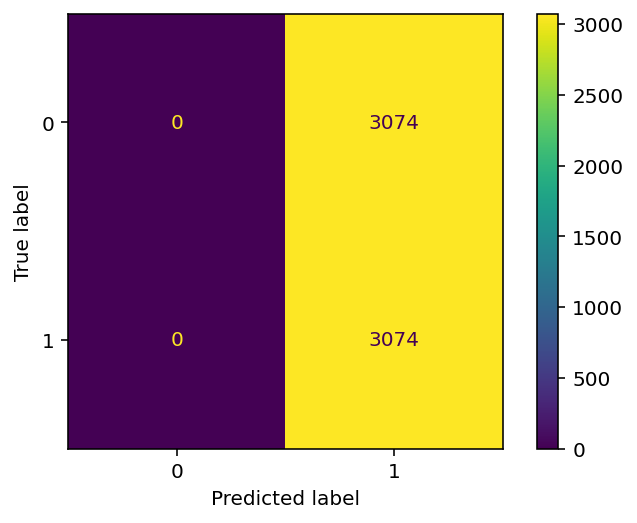

In [252]:
lr_preds = lr.predict(X_train)
plot_confusion_matrix(lr, X_train, y_train)

In [246]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[3, 4, 5, 6, 10, 15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 20}

In [247]:
%%time
# Decision Tree Classifier, great job!
dt = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

CPU times: user 923 ms, sys: 21.2 ms, total: 945 ms
Wall time: 991 ms


0.964967307605544

/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


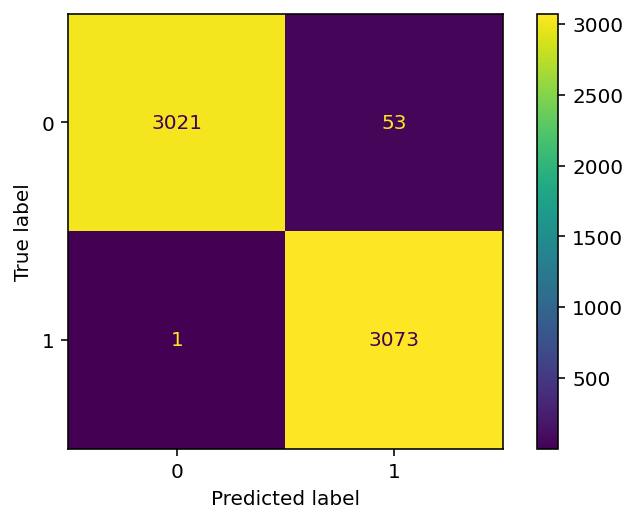

In [248]:
# Decision Tree Classifier confusion matrix
plot_confusion_matrix(dt, X_train, y_train)

In [249]:
%%time
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[3, 6,12,15,20],
    'n_estimators':[10, 20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

CPU times: user 17.3 s, sys: 506 ms, total: 17.8 s
Wall time: 22.1 s


{'max_depth': 20, 'n_estimators': 20}

In [250]:
%%time
# RandomForestClassifier, even better!
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 20, max_depth = 20).fit(X_train, y_train))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

CPU times: user 3.44 s, sys: 70.9 ms, total: 3.51 s
Wall time: 3.62 s


0.9841306519933355

/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


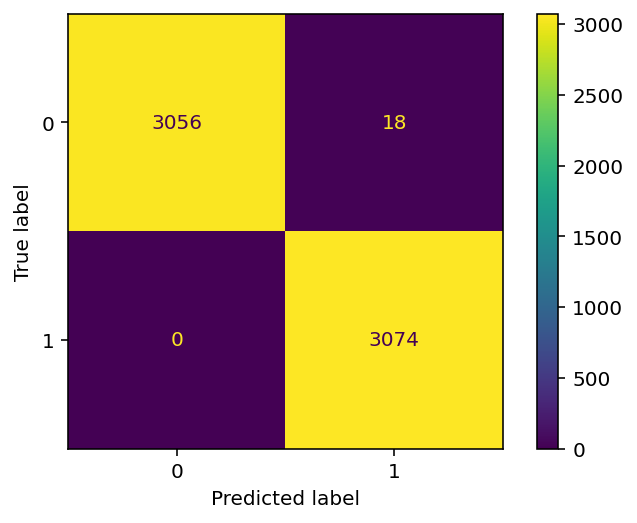

In [251]:
plot_confusion_matrix(rf, X_train, y_train)

In [260]:
# Hyperparameter optimization of XGboost
#I didnt optimize the parameters all at once since it will take more time
#round 1
param_grid = {'max_depth':[3,4,5],
             'learning_rate':[0.1,0.01,0.05],
             'gamma':[0,0.25,1.0],
             'reg_lambda':[0,1.0,10.0],
             'scale_pos_weight':[1,3,5]}
#round 2
param_grid2 = {'max_depth':[5,10,15,20,25,30],
             'learning_rate':[0.1,0.5,1]}
              

In [255]:
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed=42,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                              param_grid=param_grid,
                              verbose=0,
                              n_jobs=10,
                              cv=10)
optimal_params.fit(X_train,
                   y_train,
                   early_stopping_rounds=10,
                   eval_set=[(X_test,y_test)],
                   verbose=False)
print(optimal_params.best_params_)
            

/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 0, 'scale_pos_weight': 1}


In [261]:
#round 2
optimal_params = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',
                                                          seed=42,
                                                          subsample=0.9,
                                                          colsample_bytree=0.5),
                              param_grid=param_grid2,
                              verbose=0,
                              n_jobs=10,
                              cv=10)
optimal_params.fit(X_train,
                   y_train,
                   early_stopping_rounds=10,
                   eval_set=[(X_test,y_test)],
                   verbose=False)
print(optimal_params.best_params_)

/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


{'learning_rate': 0.1, 'max_depth': 15}


In [273]:
clf_xgb = xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=0.25,
                           learning_rate=0.1,
                           max_depth=15,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           colsample_bytree=0.5)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_set=[(X_test,y_test)])

[0]	validation_0-logloss:0.61517
[1]	validation_0-logloss:0.56030
[2]	validation_0-logloss:0.50994
[3]	validation_0-logloss:0.46210
[4]	validation_0-logloss:0.42341
[5]	validation_0-logloss:0.39047
[6]	validation_0-logloss:0.36122
[7]	validation_0-logloss:0.33570
[8]	validation_0-logloss:0.31634
[9]	validation_0-logloss:0.29556
[10]	validation_0-logloss:0.27551
[11]	validation_0-logloss:0.25926
[12]	validation_0-logloss:0.24492
[13]	validation_0-logloss:0.23065
[14]	validation_0-logloss:0.21879
[15]	validation_0-logloss:0.20822
[16]	validation_0-logloss:0.19839
[17]	validation_0-logloss:0.18898
[18]	validation_0-logloss:0.17935
[19]	validation_0-logloss:0.17241
[20]	validation_0-logloss:0.16518
[21]	validation_0-logloss:0.15683
[22]	validation_0-logloss:0.15054
[23]	validation_0-logloss:0.14502
[24]	validation_0-logloss:0.14051
[25]	validation_0-logloss:0.13653
[26]	validation_0-logloss:0.13226
[27]	validation_0-logloss:0.12805
[28]	validation_0-logloss:0.12567
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=0, ...)

/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


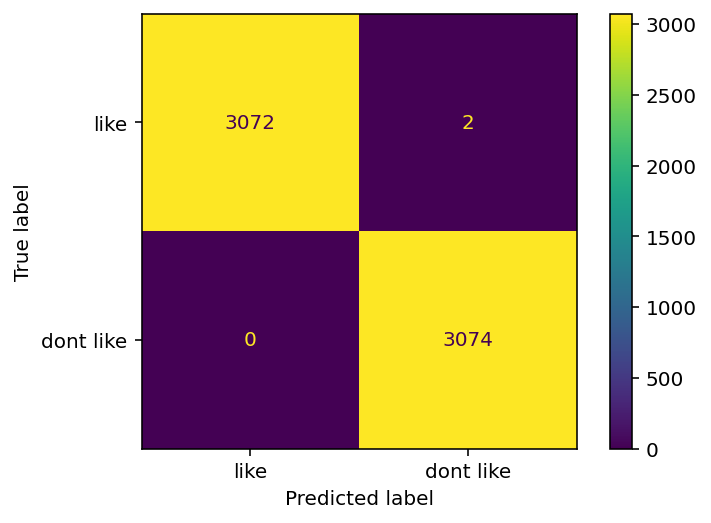

In [276]:
plot_confusion_matrix(clf_xgb,
                     X_train,
                     y_train,
                     values_format='d',
                     display_labels=['like','dont like'])

In [ ]:
#looks like XGboost performs the best so far and therefore I decided to go with it!

# Using XGboost on Test Data 

In [285]:
# Checking for imbalance
y_test.value_counts()

0    775
1      5
Name: favorite, dtype: int64

In [286]:
# Building a pipeline to use on regular data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=0.25,
                           learning_rate=0.1,
                           max_depth=15,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           colsample_bytree=0.5))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('clf_xgb',xgb.XGBClassifier(seed=42,
                           objective='binary:logistic',
                           gamma=0.25,
                           learning_rate=0.1,
                           max_depth=15,
                           reg_lambda=0,
                           scale_pos_weight=1,
                           colsample_bytree=0.5))])

pipe.score(X_test, y_test)

0.9692307692307692

/Users/delicate/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


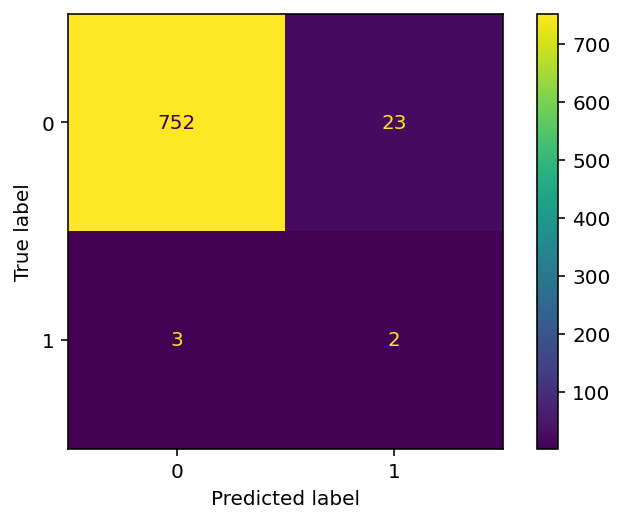

In [287]:
plot_confusion_matrix(clf_xgb, X_test, y_test)

After running evaluating the algorithm on test data, it shows there were 26 false positives and negatives combined. It was able to correctly recommend 6 songs, but mislabeled 24 songs as future favorites; however, this might be a good thing. The algorithm only recommended 6 songs, but for the purpose of this project, I would like for there to be atleast 15 songs in the playlist. These false positives can mitigate the issue of not enough songs.

# Predicting songs and saving to dataset

In [324]:
# Reloading the original dataframe to test the model on
df = pd.read_csv('encoded_playlist_songs.csv')

In [325]:
df.head()

,track_id,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,duration_ms,key,valence,speechiness,favorite
0,0O6u0VJ46W86TxN9wgyqDj,0.733,0.1210,0.670,100.964,0.000000,-6.009,0.1210,192841,5,0.472,0.0751,0
1,6xGruZOHLs39ZbVccQTuPZ,0.440,0.8910,0.317,169.914,0.000005,-9.258,0.1410,233456,8,0.268,0.0531,0
2,29d0nY7TzCoi22XBqDQkiP,0.625,0.6590,0.533,108.296,0.002660,-11.903,0.0546,300840,10,0.139,0.0596,0
3,0mBP9X2gPCuapvpZ7TGDk3,0.881,0.6190,0.592,101.058,0.000013,-4.898,0.0901,154487,2,0.719,0.0324,0
4,2KukL7UlQ8TdvpaA7bY3ZJ,0.687,0.0575,0.887,114.941,0.000002,-5.040,0.2700,278282,1,0.853,0.0826,0


Since the model has a very niche idea of what a favorite song is based on the favorites dataset, it is necessary to accept songs that might not be absolute favorites. This is done by using a threshold and sklearn's proba function.

I've defined the threshold as 0.2 to get approximately 40 song recommendations from nearly 4,000 songs to choose from. You can play with this value if you'd like more or less songs in the recommendation playlist.

In [326]:
# Predicting if a song is a favorite
prob_preds = pipe.predict_proba(df.drop(['favorite','track_id'], axis=1))
threshold = 0.20 # define threshold here
preds = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]
df['prediction'] = preds

In [327]:
df['prediction'].value_counts()

0    3808
1      41
Name: prediction, dtype: int64

# Building the playlist from recommended songs

In [328]:
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2

In [330]:
# Insert your Spotify username and the credentials that you obtained from spotify developer
cid = '0f1c642aefdb4cb28858699ef38ad085'
secret = 'ac283cc370b24d45ad02a95f01dac01c'
redirect_uri='http://localhost:7777/callback'
username = '31qw2kdk57kchr2rpjmesnl3zvvu'

In [331]:
def create_playlist(sp, username, playlist_name, playlist_description):
    playlists = sp.user_playlist_create(username, playlist_name, description = playlist_description)

In [332]:
create_playlist(sp, username, 'Scotts Hit', 'Machine Learning is fun!')

In [333]:
# Function to check if the playlist was created successfully
def fetch_playlists(sp, username):
    """
    Returns the user's playlists.
    """
        
    id = []
    name = []
    num_tracks = []
    
    # Make the API request
    playlists = sp.user_playlists(username)
    for playlist in playlists['items']:
        id.append(playlist['id'])
        name.append(playlist['name'])
        num_tracks.append(playlist['tracks']['total'])

    # Create the final df   
    df_playlists = pd.DataFrame({"id":id, "name": name, "#tracks": num_tracks})
    return df_playlists

In [334]:
fetch_playlists(sp,username).head()

,id,name,#tracks
0,7yC0qu3GRvSYm99a4gh3xL,Scotts Hit,0
1,24yhq8cDYPd6is4Bt0Hzgl,Cruise Control,3
2,1ucfz4c0LYqjt5I0tH1qlZ,Crazy lyrics,2
3,0VmC70SStPWAKBajwPckwh,throw it back,173
4,7zDZAn5vakLX0zTPRi8CyL,4U,7


In [335]:
# Getting the playlist ID of the most recently made playlist so we can add songs to it later
playlist_id = fetch_playlists(sp,username)['id'][0]

In [336]:
# Function to add selected songs to playlist
def enrich_playlist(sp, username, playlist_id, playlist_tracks):
    index = 0
    results = []
    
    while index < len(playlist_tracks):
        results += sp.user_playlist_add_tracks(username, playlist_id, tracks = playlist_tracks[index:index + 50])
        index += 50

In [337]:
# Adding songs to playlist
list_track = df.loc[df['prediction']  == 1]['track_id']
enrich_playlist(sp, username, playlist_id, list_track)

In [ ]:
#There you have it! 